In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from elasticsearch import Elasticsearch

%matplotlib inline

In [8]:
es = Elasticsearch(['elastic:9200'])

res = es.search(index='games_test', body={
    "size": 100,
    "query": {"match": {
        "genres": "Free to Play"
    }}
})
hits = res['hits']['total']
print("Got %d hits" % hits)

Got 36 hits


In [20]:
def categories_data(response):
    categories = set()
    numbers = []
    ctg = []
    data = {}
    for val in response['hits']['hits']:
        for ct in val['_source']['categories']:
            categories.add(ct)
            ctg.append(ct)
    for ct in categories:
        numbers.append(ctg.count(ct))
    data['categories'] = list(categories)
    data['count'] = numbers
    return pd.DataFrame.from_dict(data)

ctg_data = categories_data(res)
ctg_data.head(20)

,categories,count
0,PvP,16
1,Clicker,2
2,Addictive,1
3,Sexual Content,1
4,Free to Play,35
5,Touch-Friendly,2
6,Mythology,1
7,Character Customization,6
8,Classic,2
9,Management,3


In [4]:
print("Numbers of categories for Free to Play genre: %d" % len(ctg_data))

Numbers of categories for Free to Play genre: 127


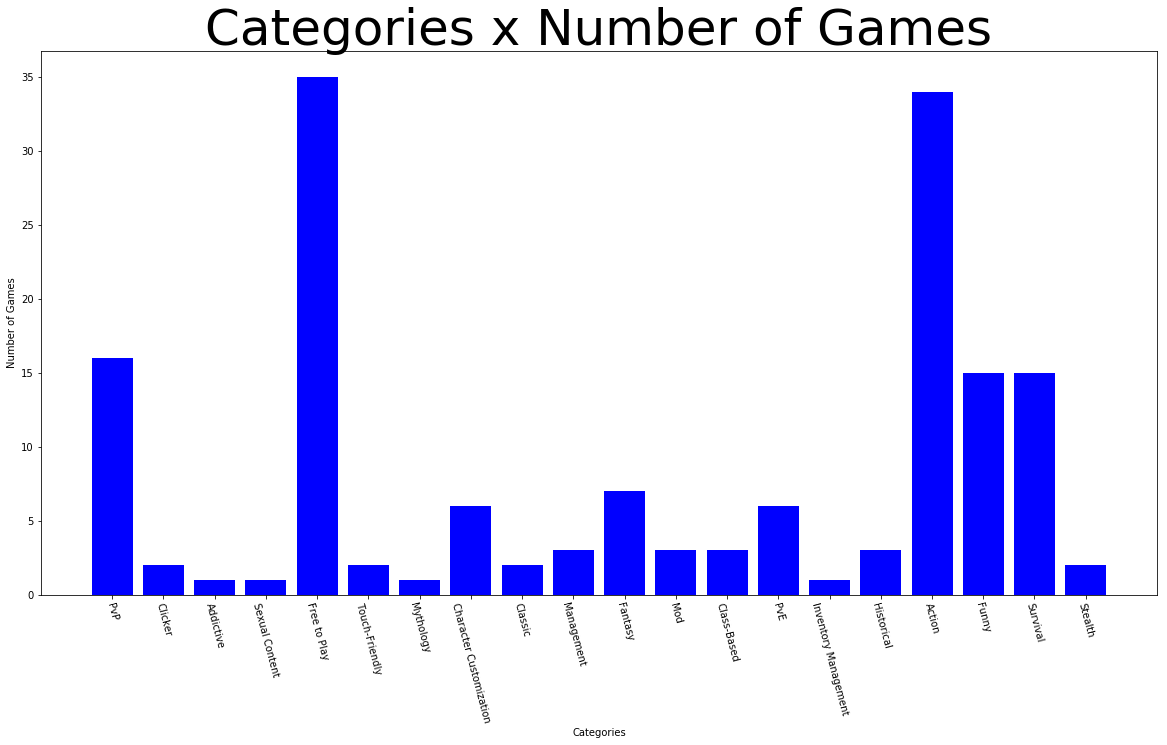

In [39]:
plt.figure(figsize=(20,10), facecolor='w')
plt.xlabel('Categories')
plt.ylabel('Number of Games')
plt.title('Categories x Number of Games', fontdict={'fontsize': 50})
plt.bar(ctg_data['categories'].head(20), ctg_data['count'].head(20), color='blue', width=0.8)
plt.xticks(rotation=-75)
plt.show()

In [21]:
ctg_data.sort_values(['count']).head(20)

,categories,count
126,RTS,1
37,Fishing,1
111,Illuminati,1
110,Flight,1
86,Tanks,1
44,Moddable,1
46,Dark Fantasy,1
48,Local Co-Op,1
49,Arcade,1
103,2D Fighter,1


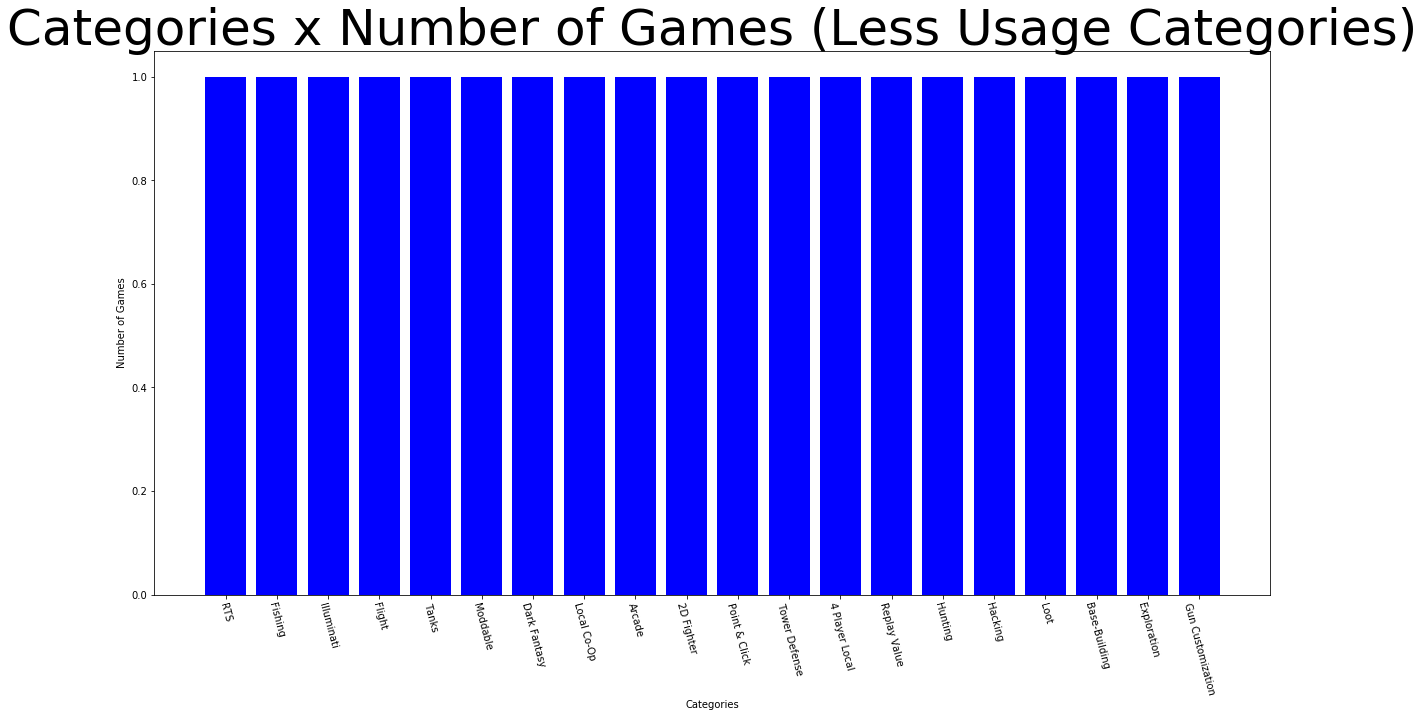

In [40]:
ascending_data = ctg_data.sort_values(['count']).head(20)
plt.figure(figsize=(20,10), facecolor='w')
plt.xlabel('Categories')
plt.ylabel('Number of Games')
plt.title('Categories x Number of Games (Less Usage Categories)', fontdict={'fontsize': 50})
plt.bar(ascending_data['categories'], ascending_data['count'], color='blue', width=0.8, )
plt.xticks(rotation=-75)
plt.show()

In [22]:
ctg_data.sort_values(['count'], ascending=[False]).head(20)

,categories,count
123,Multiplayer,35
4,Free to Play,35
16,Action,34
100,Co-op,32
58,Massively Multiplayer,30
104,Adventure,25
102,FPS,23
30,Shooter,22
108,Open World,22
76,Singleplayer,18


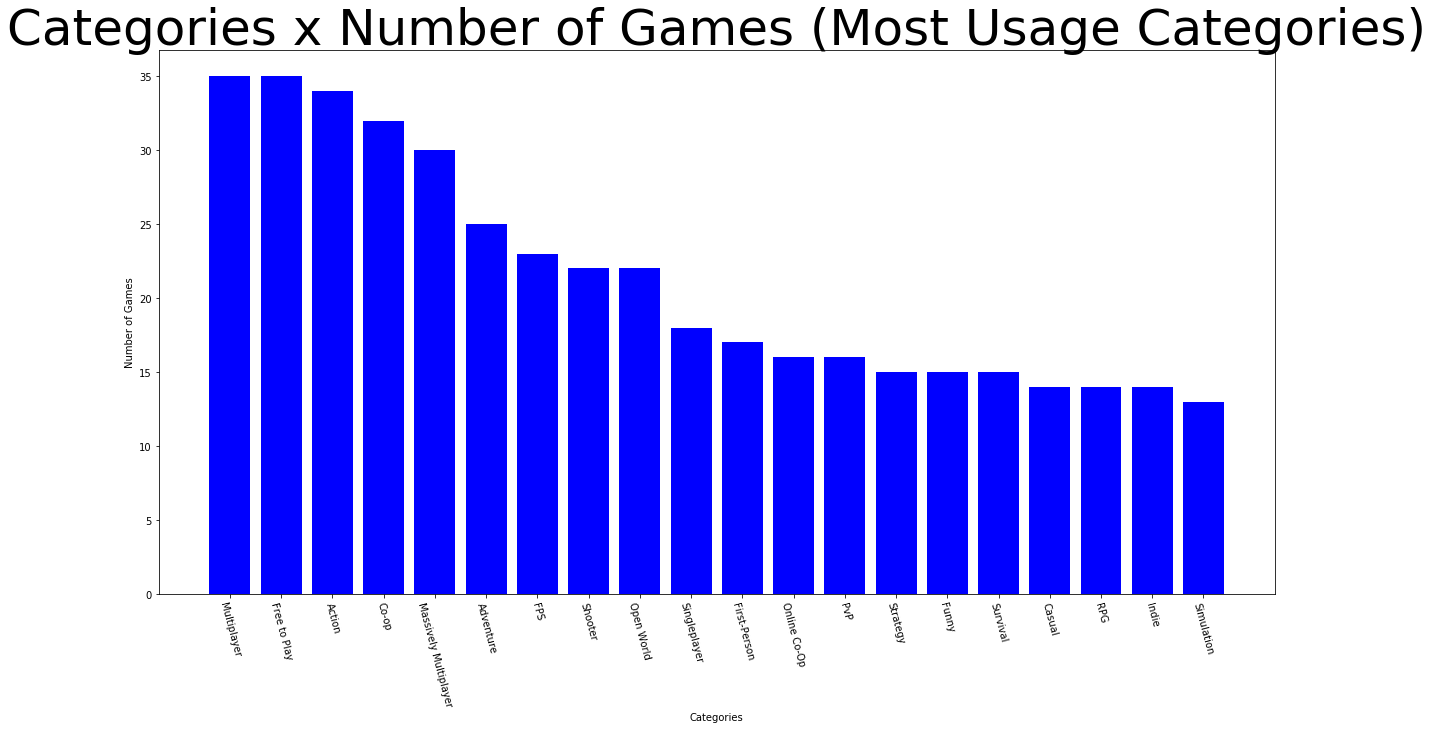

In [38]:
descending_data = ctg_data.sort_values(['count'], ascending=[False]).head(20)
plt.figure(figsize=(20,10), facecolor='w')
plt.xlabel('Categories')
plt.ylabel('Number of Games')
plt.title('Categories x Number of Games (Most Usage Categories)', fontdict={'fontsize': 50})
plt.bar(descending_data['categories'], descending_data['count'], color='blue', width=0.8, )
plt.xticks(rotation=-75)
plt.show()

In [36]:
def number_of_owners(response):
    num_own = 0
    for val in response['hits']['hits']:
        num_own += val['_source']['owners']
        
    return num_own

num_own = number_of_owners(res)
num_own

488500000

In [37]:
print("Avarege of number of owners of Free to Play genre: %d" % (num_own / hits))

Avarege of number of owners of Free to Play genre: 13569444


In [43]:
def initialize_map(response):
    categories_map = {}
    for val in response['hits']['hits']:
        for ctg in val['_source']['categories']:
            categories_map[ctg] = 0
    return categories_map

ctg_map = initialize_map(res)

In [57]:
def ctg_x_owners(response, ctg_map):
    data = {}
    for val in response['hits']['hits']:
         for ctg in val['_source']['categories']:
                ctg_map[ctg] += val['_source']['owners']
    data['categories'] = list(ctg_map.keys())
    data['owners'] = list(ctg_map.values())
    return pd.DataFrame.from_dict(data)

ctg_owners_data = ctg_x_owners(res, ctg_map)
ctg_owners_data.head(20)

,categories,owners
0,Free to Play,4810000000
1,Multiplayer,4850000000
2,FPS,2610000000
3,Shooter,2690000000
4,Action,4815000000
5,Team-Based,2560000000
6,First-Person,1850000000
7,MOBA,1725000000
8,PvP,2730000000
9,Online Co-Op,3165000000


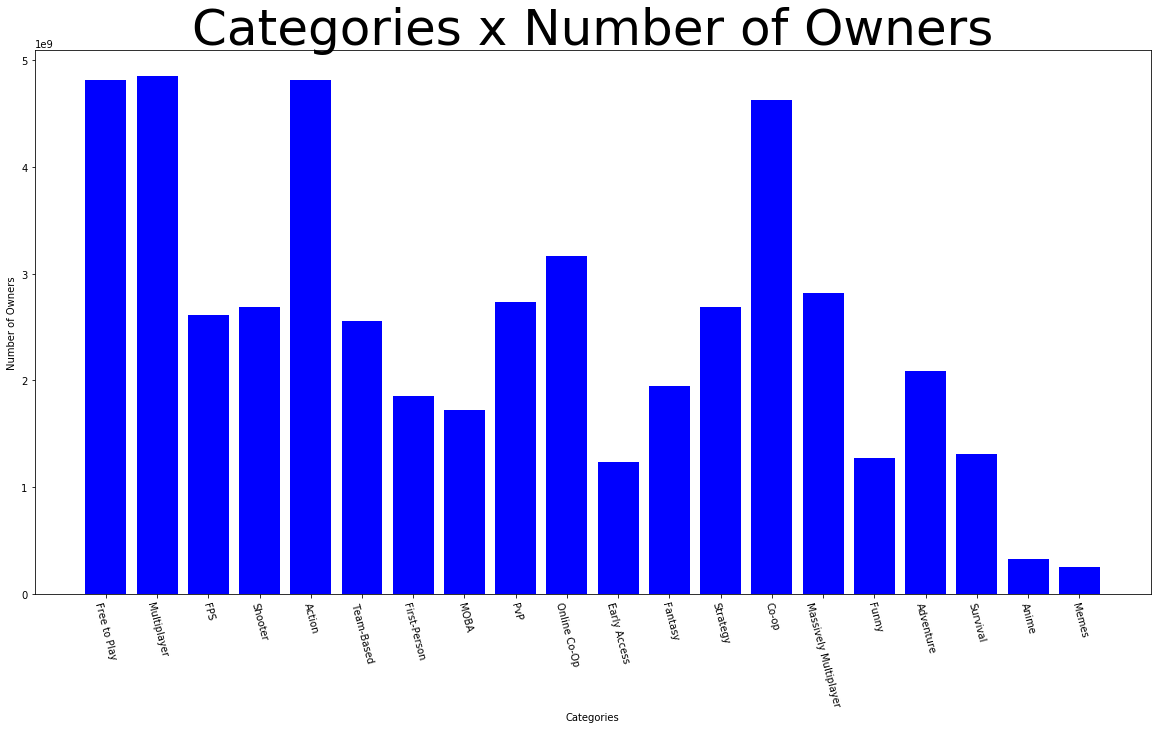

In [59]:
plt.figure(figsize=(20,10), facecolor='w')
plt.xlabel('Categories')
plt.ylabel('Number of Owners')
plt.title('Categories x Number of Owners', fontdict={'fontsize': 50})
plt.bar(ctg_owners_data['categories'].head(20), ctg_owners_data['owners'].head(20), color='blue', width=0.8)
plt.xticks(rotation=-75)
plt.show()

In [66]:
ctg_owners_data.sort_values(['owners']).head(20)

,categories,owners
74,Western,35000000
122,Sexual Content,35000000
121,Psychological Horror,35000000
106,Basketball,35000000
79,Driving,35000000
32,Capitalism,35000000
84,3D Vision,35000000
115,Cute,35000000
43,Base-Building,35000000
36,Point & Click,35000000


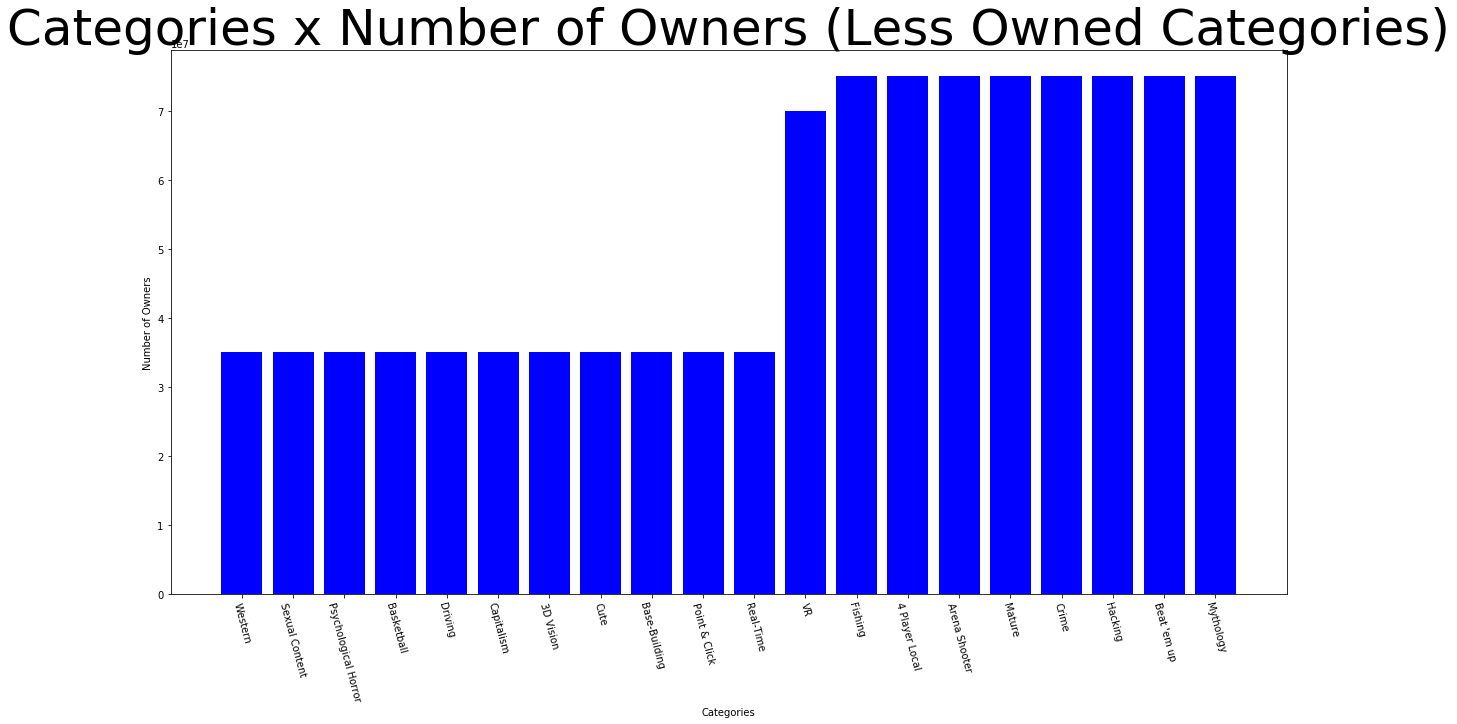

In [62]:
ascending_data = ctg_owners_data.sort_values(['owners']).head(20)
plt.figure(figsize=(20,10), facecolor='w')
plt.xlabel('Categories')
plt.ylabel('Number of Owners')
plt.title('Categories x Number of Owners (Less Owned Categories)', fontdict={'fontsize': 50})
plt.bar(ascending_data['categories'], ascending_data['owners'], color='blue', width=0.8, )
plt.xticks(rotation=-75)
plt.show()

In [67]:
ctg_owners_data.sort_values(['owners'], ascending=[False]).head(20)

,categories,owners
1,Multiplayer,4850000000
4,Action,4815000000
0,Free to Play,4810000000
13,Co-op,4630000000
9,Online Co-Op,3165000000
14,Massively Multiplayer,2815000000
8,PvP,2730000000
3,Shooter,2690000000
12,Strategy,2690000000
46,RPG,2665000000


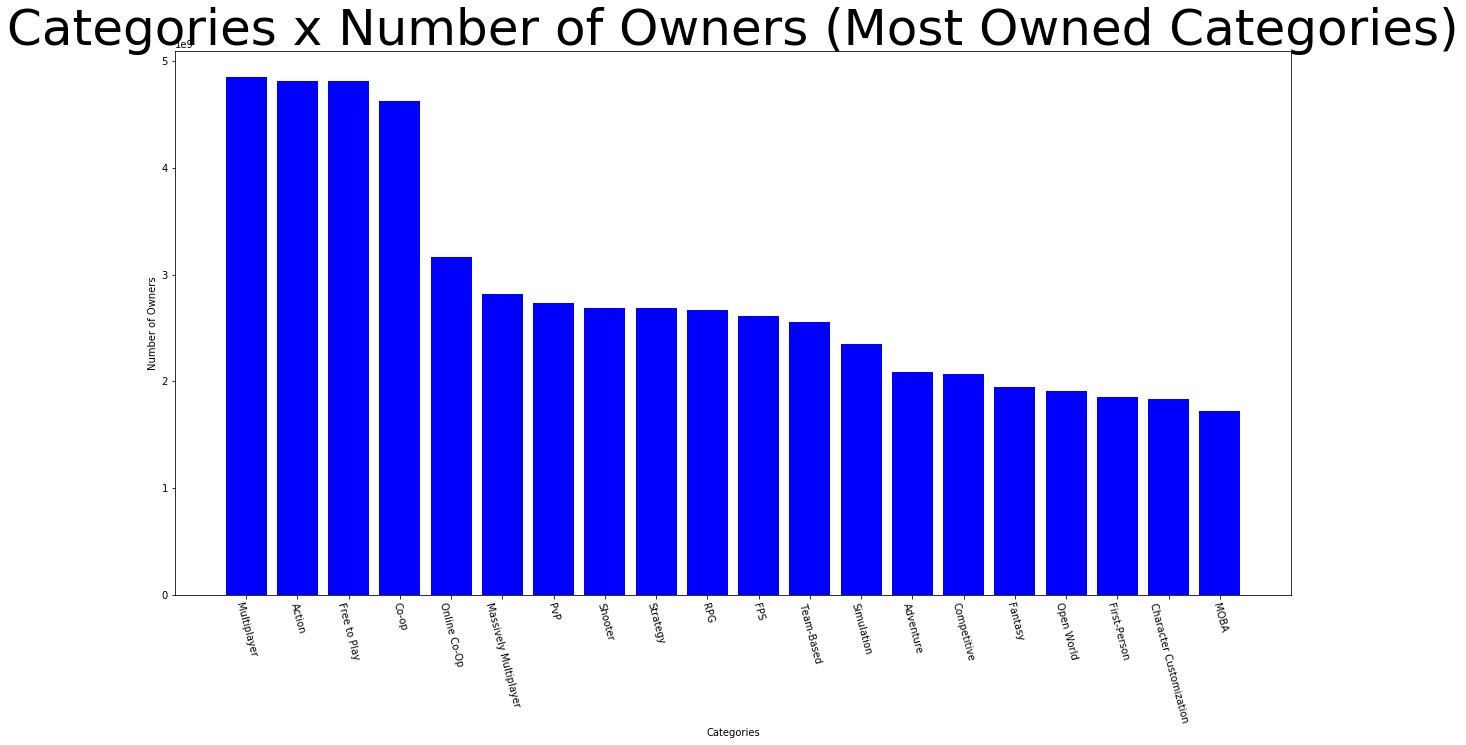

In [65]:
descending_data = ctg_owners_data.sort_values(['owners'], ascending=[False]).head(20)
plt.figure(figsize=(20,10), facecolor='w')
plt.xlabel('Categories')
plt.ylabel('Number of Owners')
plt.title('Categories x Number of Owners (Most Owned Categories)', fontdict={'fontsize': 50})
plt.bar(descending_data['categories'], descending_data['owners'], color='blue', width=0.8, )
plt.xticks(rotation=-75)
plt.show()